<a href="https://colab.research.google.com/github/HasKhan89/PYnotebooks/blob/main/Introduction_to_Statistics%2C_Data_Cleaning_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import math
import scipy.stats as stats
#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Data Cleaning

In [ ]:
food_data = pd.DataFrame({
    "productID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "productName": ["Elma", "Armut", "Muz", "Portakal", "Kivi", "Mango", "Çilek", "Üzüm", "Karpuz", "Ananas"],
    "category": ["Meyve", "Meyve", "Meyve", "Meyve", "Meyve", "Meyve", "Meyve", "Meyve", "Meyve", "Meyve"],
    "price": [3.5, 4.0, None, 5.0, None, 6.5, 4.5, None, 7.0, 8.0],
    "stock": [100, None, 150, None, 200, 250, 300, 350, None, 400],
    "supplier": ["Tedarikçi A", "Tedarikçi B", "Tedarikçi C", "Tedarikçi D", None, "Tedarikçi F", "Tedarikçi G", "Tedarikçi H", "Tedarikçi I", "Tedarikçi J"]
})

print(food_data)

   productID productName category  price  stock     supplier
0          1        Elma    Meyve    3.5  100.0  Tedarikçi A
1          2       Armut    Meyve    4.0    NaN  Tedarikçi B
2          3         Muz    Meyve    NaN  150.0  Tedarikçi C
3          4    Portakal    Meyve    5.0    NaN  Tedarikçi D
4          5        Kivi    Meyve    NaN  200.0         None
5          6       Mango    Meyve    6.5  250.0  Tedarikçi F
6          7       Çilek    Meyve    4.5  300.0  Tedarikçi G
7          8        Üzüm    Meyve    NaN  350.0  Tedarikçi H
8          9      Karpuz    Meyve    7.0    NaN  Tedarikçi I
9         10      Ananas    Meyve    8.0  400.0  Tedarikçi J


In [ ]:
# Eksik değerlerin sayısını her bir değişken için hesapla

print(food_data.isnull().sum())

productID      0
productName    0
category       0
price          3
stock          3
supplier       1
dtype: int64


In [ ]:
# Tüm eksik değerleri içeren satırları sil

food_data_cleaned = food_data.dropna()
print(food_data_cleaned)


   productID productName category  price  stock     supplier
0          1        Elma    Meyve    3.5  100.0  Tedarikçi A
5          6       Mango    Meyve    6.5  250.0  Tedarikçi F
6          7       Çilek    Meyve    4.5  300.0  Tedarikçi G
9         10      Ananas    Meyve    8.0  400.0  Tedarikçi J


In [ ]:
# Değişken silme yöntemi

food_data_without_price = food_data.drop(columns="price")  # 'price' sütununu sil

print(food_data_without_price)

   productID productName category  stock     supplier
0          1        Elma    Meyve  100.0  Tedarikçi A
1          2       Armut    Meyve    NaN  Tedarikçi B
2          3         Muz    Meyve  150.0  Tedarikçi C
3          4    Portakal    Meyve    NaN  Tedarikçi D
4          5        Kivi    Meyve  200.0         None
5          6       Mango    Meyve  250.0  Tedarikçi F
6          7       Çilek    Meyve  300.0  Tedarikçi G
7          8        Üzüm    Meyve  350.0  Tedarikçi H
8          9      Karpuz    Meyve    NaN  Tedarikçi I
9         10      Ananas    Meyve  400.0  Tedarikçi J


In [ ]:
# Ortalama ile doldurma

food_data['price'] = food_data['price'].fillna(food_data['price'].mean())  # Eksik fiyatları ortalama ile doldur

print(food_data)

   productID productName category  price  stock     supplier
0          1        Elma    Meyve    3.5  100.0  Tedarikçi A
1          2       Armut    Meyve    4.0    NaN  Tedarikçi B
2          3         Muz    Meyve    5.5  150.0  Tedarikçi C
3          4    Portakal    Meyve    5.0    NaN  Tedarikçi D
4          5        Kivi    Meyve    5.5  200.0         None
5          6       Mango    Meyve    6.5  250.0  Tedarikçi F
6          7       Çilek    Meyve    4.5  300.0  Tedarikçi G
7          8        Üzüm    Meyve    5.5  350.0  Tedarikçi H
8          9      Karpuz    Meyve    7.0    NaN  Tedarikçi I
9         10      Ananas    Meyve    8.0  400.0  Tedarikçi J


In [ ]:
# Medyan ile doldurma

food_data['stock'] = food_data['stock'].fillna(food_data['stock'].median())
print(food_data)

   productID productName category  price  stock     supplier
0          1        Elma    Meyve    3.5  100.0  Tedarikçi A
1          2       Armut    Meyve    4.0  250.0  Tedarikçi B
2          3         Muz    Meyve    5.5  150.0  Tedarikçi C
3          4    Portakal    Meyve    5.0  250.0  Tedarikçi D
4          5        Kivi    Meyve    5.5  200.0         None
5          6       Mango    Meyve    6.5  250.0  Tedarikçi F
6          7       Çilek    Meyve    4.5  300.0  Tedarikçi G
7          8        Üzüm    Meyve    5.5  350.0  Tedarikçi H
8          9      Karpuz    Meyve    7.0  250.0  Tedarikçi I
9         10      Ananas    Meyve    8.0  400.0  Tedarikçi J


In [ ]:
# Mod ile doldurma

food_data['supplier'] = food_data['supplier'].fillna(food_data['supplier'].mode()[0])  # Eksik tedarikçi değerlerini mod ile doldur
print(food_data)


   productID productName category  price  stock     supplier
0          1        Elma    Meyve    3.5  100.0  Tedarikçi A
1          2       Armut    Meyve    4.0  250.0  Tedarikçi B
2          3         Muz    Meyve    5.5  150.0  Tedarikçi C
3          4    Portakal    Meyve    5.0  250.0  Tedarikçi D
4          5        Kivi    Meyve    5.5  200.0  Tedarikçi A
5          6       Mango    Meyve    6.5  250.0  Tedarikçi F
6          7       Çilek    Meyve    4.5  300.0  Tedarikçi G
7          8        Üzüm    Meyve    5.5  350.0  Tedarikçi H
8          9      Karpuz    Meyve    7.0  250.0  Tedarikçi I
9         10      Ananas    Meyve    8.0  400.0  Tedarikçi J


In [ ]:
# Tedarikçi kategorilerinin benzersiz değerlerini göster

print(food_data['supplier'].unique())

['Tedarikçi A' 'Tedarikçi B' 'Tedarikçi C' 'Tedarikçi D' 'Tedarikçi F'
 'Tedarikçi G' 'Tedarikçi H' 'Tedarikçi I' 'Tedarikçi J']


#Statistics

In [ ]:
data = pd.Series([1, 2, 3, 4, 5])

In [ ]:
print(data)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [ ]:
mean = data.mean()

In [ ]:
print(mean)

3.0


In [ ]:
mean

3.0

In [ ]:
print(f'Ortalama: {mean}')

Ortalama: 3.0


In [ ]:
print(data.median())

3.0


In [ ]:
data2 = pd.Series([1, 2, 3, 4, 5, 6, 7])

In [ ]:
data2.median()

4.0

In [ ]:
data3 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
data3.median()

4.5

In [ ]:
data4 = pd.Series([1, 2, 3, 4, 4, 5, 6, 7, 8])

In [ ]:
data4.mod(5)

,0
0,1
1,2
2,3
3,4
4,4
5,0
6,1
7,2
8,3


In [ ]:
data4.mode()

,0
0,4


In [ ]:
std_dev = data.std()

In [ ]:
print(f'Standart Sapma: {std_dev}')

Standart Sapma: 1.5811388300841898


In [ ]:
s1 = pd.Series([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [ ]:
print(s1.var())

22.666666666666668


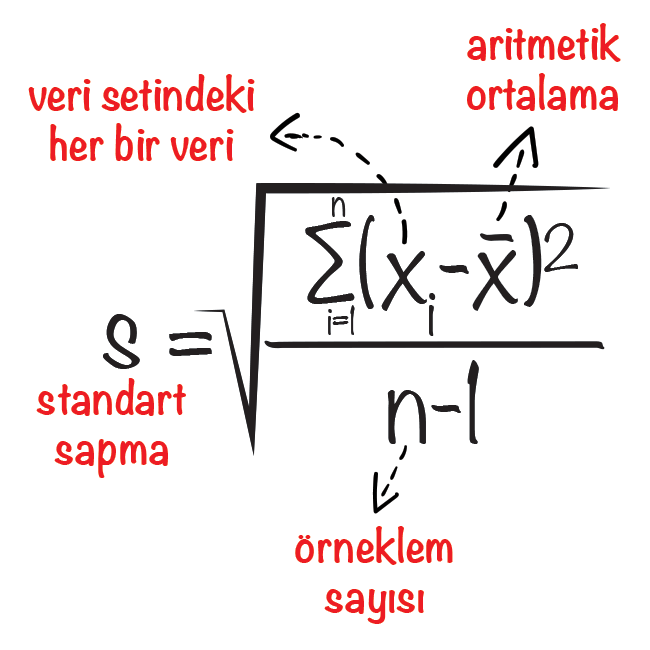

ImgRef: https://www.kemalsahin.com/standart-sapma-nasil-hesaplanir/

In [ ]:
ort_s1 = s1.mean()
print(ort_s1)

10.5


In [ ]:
fark_s1 = s1 - ort_s1
print(fark_s1)

0    -7.5
1    -6.5
2    -5.5
3    -4.5
4    -3.5
5    -2.5
6    -1.5
7    -0.5
8     0.5
9     1.5
10    2.5
11    3.5
12    4.5
13    5.5
14    6.5
15    7.5
dtype: float64


In [ ]:
kare_fark_s1 = fark_s1 ** 2
print(kare_fark_s1)

0     56.25
1     42.25
2     30.25
3     20.25
4     12.25
5      6.25
6      2.25
7      0.25
8      0.25
9      2.25
10     6.25
11    12.25
12    20.25
13    30.25
14    42.25
15    56.25
dtype: float64


In [ ]:
len(s1)

16

In [ ]:
var_s1 = kare_fark_s1.sum() /(len(s1)-1)   # Burası n-1 çünkü örnek varyansı hesaplıyoruz.
print(var_s1)

22.666666666666668


In [ ]:
std_s1 = var_s1 ** 0.5
print(std_s1)

4.760952285695233


In [ ]:
s1.var()

22.666666666666668

In [ ]:
s1.std()

4.760952285695233

#Dağılımlar


**Normal Dağılım / Gaussian Dağılım / Çan Eğrisi**



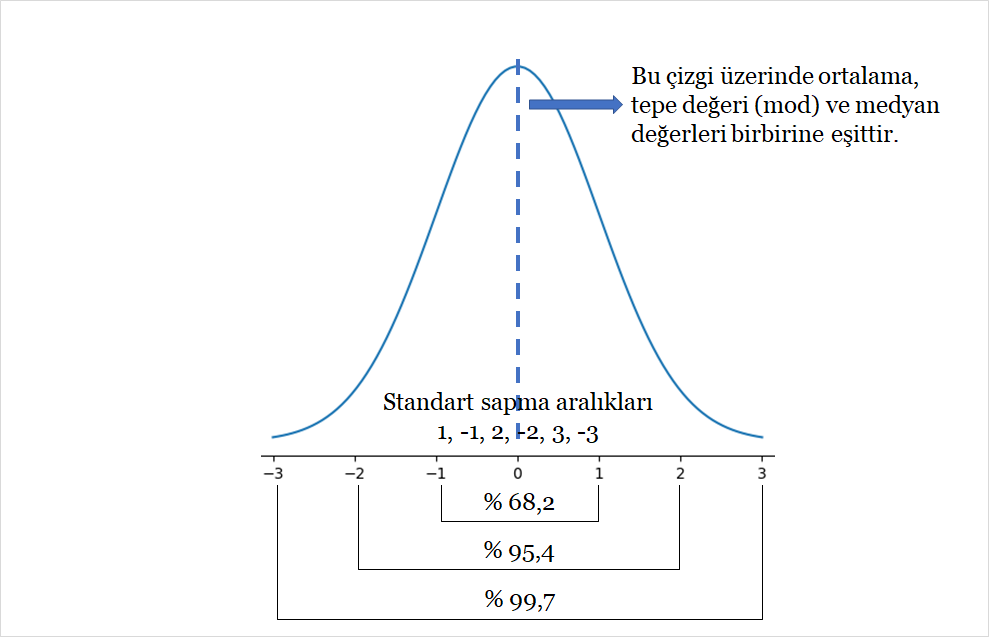

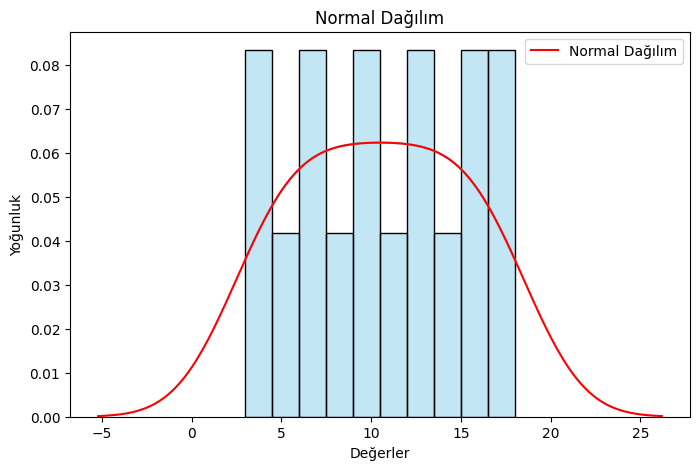

In [ ]:
# Normal Dağılım

plt.figure(figsize=(8, 5))
sns.histplot(s1, kde=True, bins=10, color="skyblue", stat="density")
sns.kdeplot(s1, color="red", label="Normal Dağılım")
plt.title("Normal Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()

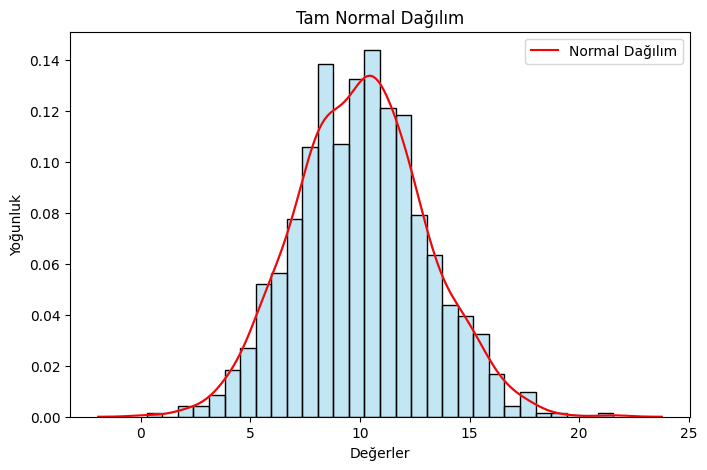

In [ ]:
# Tam normal dağılım için rastgele veri oluşturuyoruz
np.random.seed(42)
normal_data = np.random.normal(loc=10, scale=3, size=1000)  # Ortalama = 10, Standart Sapma = 3


plt.figure(figsize=(8, 5))
sns.histplot(normal_data, kde=True, bins=30, color="skyblue", stat="density")
sns.kdeplot(normal_data, color="red", label="Normal Dağılım")
plt.title("Tam Normal Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()

Uniform Dağılım



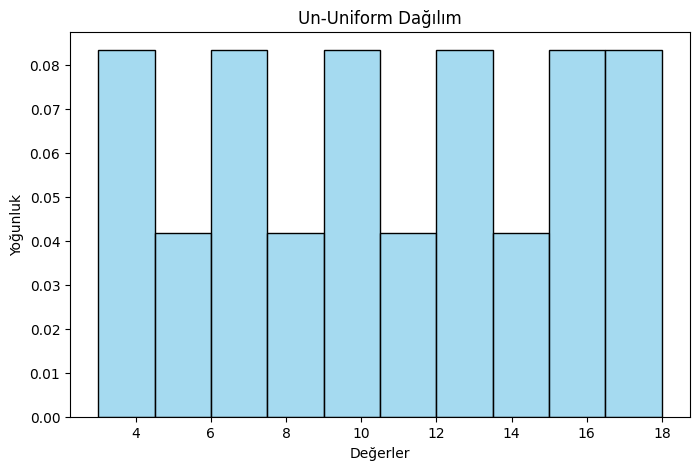

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(s1, kde=False, bins=10, color="skyblue", stat="density")
plt.title("Un-Uniform Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.show()

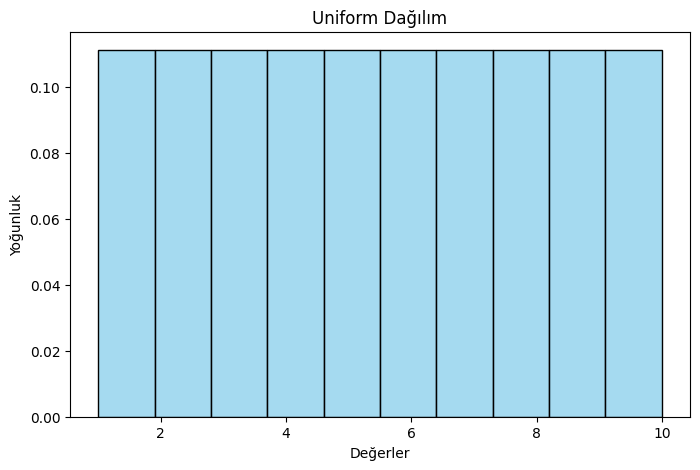

In [ ]:
uniform = pd.Series(range(1, 11))

plt.figure(figsize=(8, 5))
sns.histplot(uniform, kde=False, bins=10, color="skyblue", stat="density")
plt.title("Uniform Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.show()

**Skeweness - Çarpıklık**

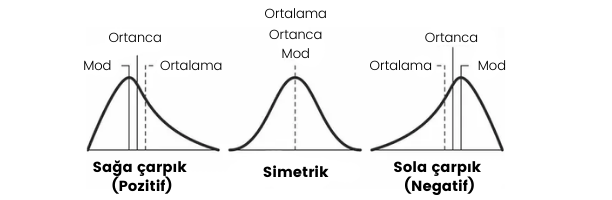

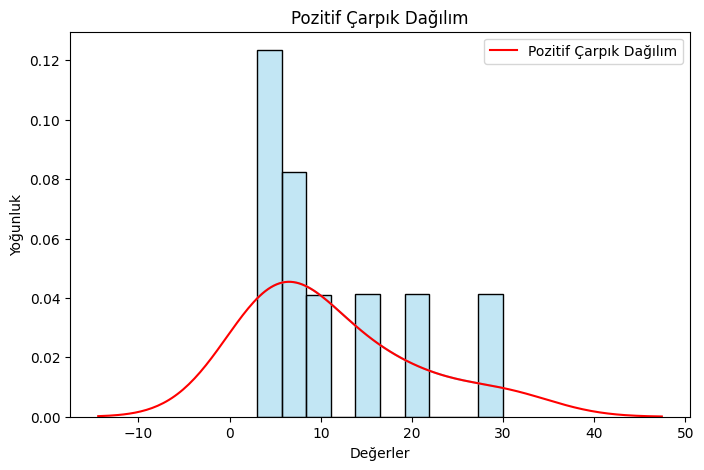

In [ ]:
pozitif_carpik = pd.Series([3, 4, 5, 6, 7, 10, 15, 20, 30])

plt.figure(figsize=(8, 5))
sns.histplot(pozitif_carpik, kde=True, bins=10, color="skyblue", stat="density")
sns.kdeplot(pozitif_carpik, color="red", label="Pozitif Çarpık Dağılım")
plt.title("Pozitif Çarpık Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()

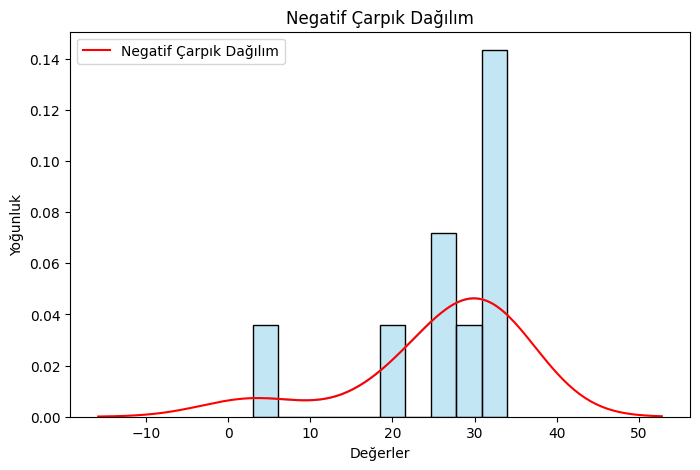

In [ ]:
negatif_carpik = pd.Series([3, 20, 25, 27, 30, 31, 32, 33, 34])

plt.figure(figsize=(8, 5))
sns.histplot(negatif_carpik, kde=True, bins=10, color="skyblue", stat="density")
sns.kdeplot(negatif_carpik, color="red", label="Negatif Çarpık Dağılım")
plt.title("Negatif Çarpık Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()

**Bimodal Dağılım**

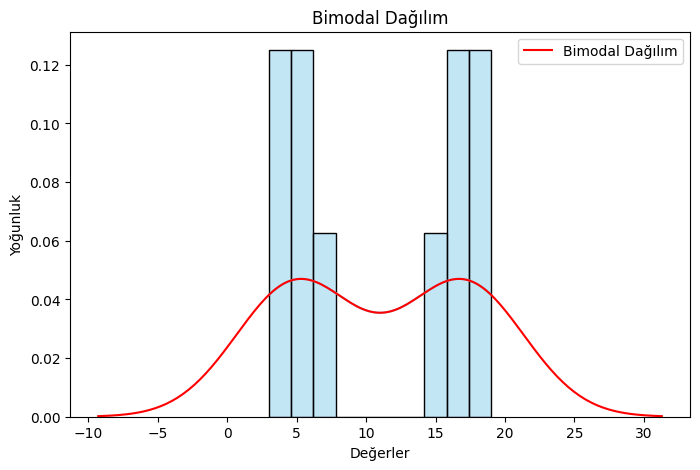

In [ ]:
bimodal = pd.Series([3, 4, 5, 6, 7, 15, 16, 17, 18, 19])

plt.figure(figsize=(8, 5))
sns.histplot(bimodal, kde=True, bins=10, color="skyblue", stat="density")
sns.kdeplot(bimodal, color="red", label="Bimodal Dağılım")
plt.title("Bimodal Dağılım")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()

In [ ]:
# numpy'da statistics metodları için: https://numpy.org/doc/stable/reference/routines.statistics.html

In [ ]:
# Numpy'da uygulama
# Veri oluşturma

ndata = np.array([1, 2, 3, 4, 5])

In [ ]:
mean_value = np.mean(ndata)
print(mean_value)

3.0


In [ ]:
median_value = np.median(ndata)
print(median_value)

3.0


In [ ]:
std_dev = np.std(ndata)
print(std_dev)

1.4142135623730951


In [ ]:
print("Ortalama:", np.mean(ndata))
print("Medyan:", np.median(ndata))
print("Standart Sapma:", np.std(ndata))

Ortalama: 3.0
Medyan: 3.0
Standart Sapma: 1.4142135623730951


In [ ]:
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8]
})


In [ ]:
print("Eksik Veri İçeren DataFrame:")
print(df)


Eksik Veri İçeren DataFrame:
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  NaN
3  4.0  8.0


In [ ]:
print("\nEksik Verili Satırları Silme:")
print(df.dropna())



Eksik Verili Satırları Silme:
     A    B
0  1.0  5.0
3  4.0  8.0


In [ ]:
print("\nEksik Verileri 0 ile Doldurma:")
print(df.fillna(0))


Eksik Verileri 0 ile Doldurma:
     A    B
0  1.0  5.0
1  2.0  0.0
2  0.0  0.0
3  4.0  8.0


In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
print("Normalleştirilmiş Veri:")
print(normalized_data)

Normalleştirilmiş Veri:
[[0.         0.        ]
 [0.33333333        nan]
 [       nan        nan]
 [1.         1.        ]]


# VERİ İLE ÇALIŞMA

In [ ]:
iris = pd.read_csv('/content/gdrive/MyDrive/iris.csv')

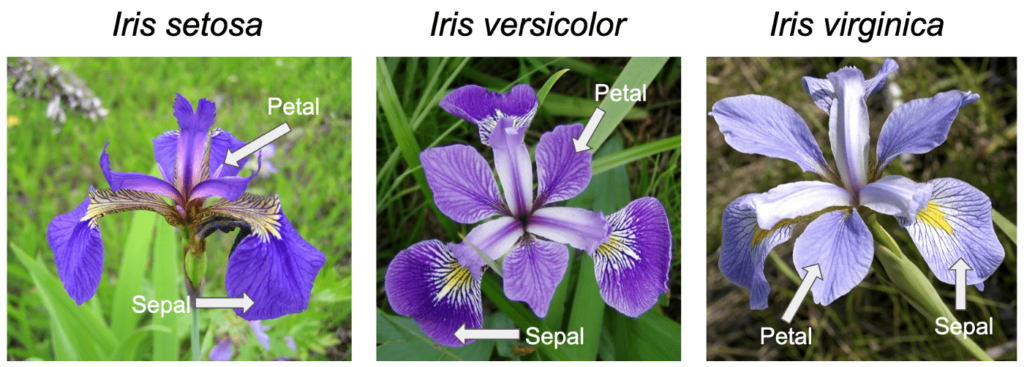

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,1.017901,-0.084214,0.778555,1.523968,Iris-virginica
146,0.509020,-1.297001,0.547708,0.813193,Iris-virginica
147,0.778555,-0.084214,0.778555,0.949666,Iris-virginica
148,0.378986,0.848835,0.873207,1.523968,Iris-virginica
149,0.109568,-0.084214,0.669219,0.627699,Iris-virginica


In [ ]:
#id sütununu çıkaralım
iris.drop(columns=['Id'],inplace=True)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.shape

(150, 5)

In [ ]:
# eksik veri var mı kontrol edelim
iris_null = iris.isnull().sum()
print(iris_null)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# tekrar eden veri var mı kontrol edelim

iris_duplicates = iris.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in Data: {iris_duplicates}")

Number of duplicate rows in Data: 3


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# istatiksel değerlerini görelim
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Kategorik sütunları görelim
object_columns = iris.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


In [ ]:
#Numerik sütunları görelim

float_columns = iris.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
The Value Count of Float Columns is : 4


# Tek değişkenli istatiksel analiz

In [ ]:
def print_feature_stats(iris):
    numeric_features = iris.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        feature_data = iris[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_count = feature_data.count()

        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print()
print_feature_stats(iris)

Feature: SepalLengthCm
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Count: 150

Feature: SepalWidthCm
Mean: 3.05
Median: 3.00
Standard Deviation: 0.43
Count: 150

Feature: PetalLengthCm
Mean: 3.76
Median: 4.35
Standard Deviation: 1.76
Count: 150

Feature: PetalWidthCm
Mean: 1.20
Median: 1.30
Standard Deviation: 0.76
Count: 150



#Boxplot

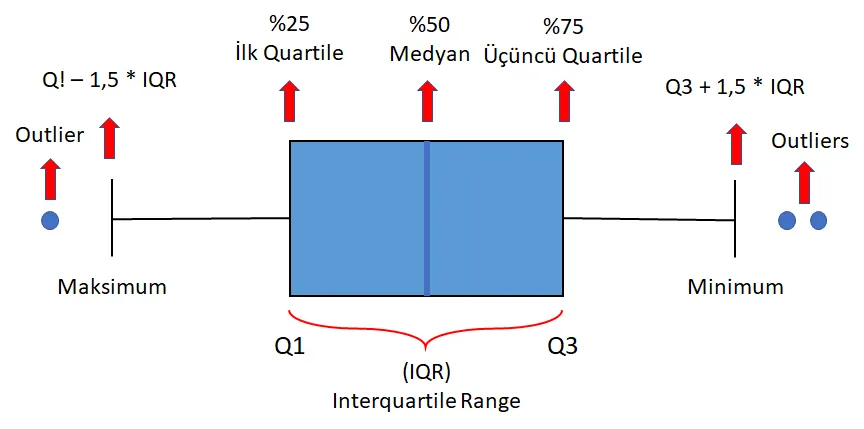

**Merkezi Değer:**

Ortanca çizgi kutunun tam ortasındaysa veri dengeli dağılmış demektir.
Ortanca çizgi kutunun altına yakınsa veri daha çok düşük değerlere, üstüne yakınsa yüksek değerlere toplanmış olabilir.

**Dağılım Genişliği:**

Kutu genişse veri çok dağılmıştır (veriler birbirinden uzak).
Kutu darsa veri daha sıkı toplanmıştır (veriler birbirine yakın).

**Simetri:**

Bıyıkların uzunluğu eşitse veri dengeli (simetrik) dağılmıştır.
Bıyıklardan biri daha uzunsa veri o yöne doğru kaymıştır (çarpık).

**Aykırı Değerler:**

Bıyıkların dışındaki noktalar veri setinde sıra dışı değerlerdir.

# SepalLengthCm vs Species

In [ ]:
# Sepal Uzunluk ve Tür kıyaslamasına bakalım

custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']

fig_boxplot = px.box(iris, x="Species", y="SepalLengthCm", title="Box Plot of SepalLengthCm by Species",
                     color='Species',
                     color_discrete_sequence=custom_colors
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalLengthCm",)

# Show the box plot
fig_boxplot.show()


In [ ]:
# daha dar bir görseleştirme için
fig_boxplot = px.box(iris,
                     x="Species",
                     y="SepalLengthCm",
                     title="Box Plot of SepalLengthCm by Species",
                     color='Species',
                     color_discrete_sequence=custom_colors)

fig_boxplot.update_layout(
    xaxis_title="Species",
    yaxis_title="SepalLengthCm",
    width=600,  # Genişliği ayarlayın
    height=400  # Yüksekliği ayarlayın
)


fig_boxplot.show()

In [ ]:
# küsüratlı değerleri de göstersin

fig_boxplot = px.box(iris,
                     x="Species",
                     y="SepalLengthCm",
                     title="Box Plot of SepalLengthCm by Species",
                     color='Species',
                     color_discrete_sequence=custom_colors)


fig_boxplot.update_layout(
    xaxis_title="Species",
    yaxis_title="SepalLengthCm",
    width=800,  # Genişlik ayarı
    height=600,  # Yükseklik ayarı
)

# Küsuratlı değerlerin gösterimi için y eksenini güncelle
fig_boxplot.update_yaxes(tickformat=".2f")  # 2 ondalık basamağı gösterir


fig_boxplot.show()


- Virginica'nın SepalLengthCm ortalama değeri diğerlerinden yüksek
- Setosa'nın SepalLengthCm ortalama değeri en düşük

# SepalWidthCm vs Species

In [ ]:
fig_boxplot = px.box(iris, x="Species", y="SepalWidthCm", title="Box Plot of SepalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalWidthCm", width=800,
    height=600)


fig_boxplot.show()


# PetalLengthCm vs Species

In [ ]:
fig_boxplot = px.box(iris, x="Species", y="PetalLengthCm", title="Box Plot of PetalLengthCm by Species",
                     color='Species',
                     color_discrete_sequence=custom_colors
                    )


fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalLengthCm", width=800,
    height=600)


fig_boxplot.show()

# PetalWidthCm vs Species

In [ ]:
fig_boxplot = px.box(iris, x="Species", y="PetalWidthCm", title="Box Plot of PetalWidthCm by Species",
                     color='Species',
                     color_discrete_sequence=custom_colors
                    )


fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalWidthCm", width=800,
    height=600)


fig_boxplot.show()

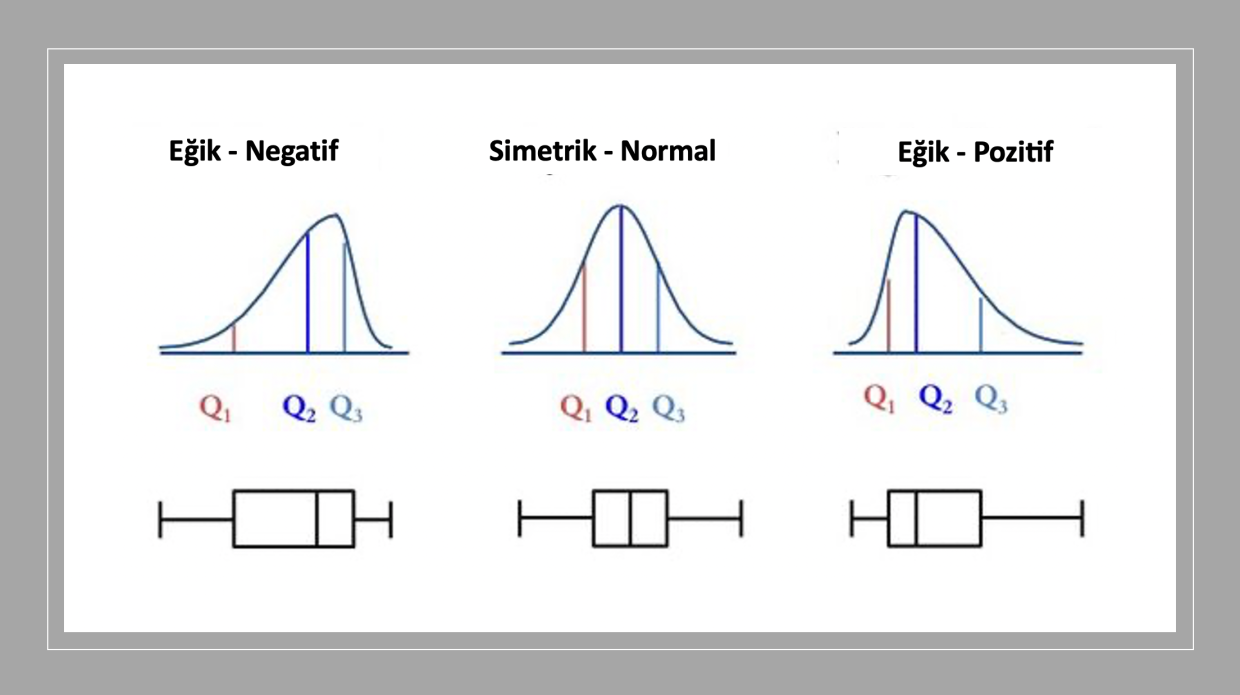

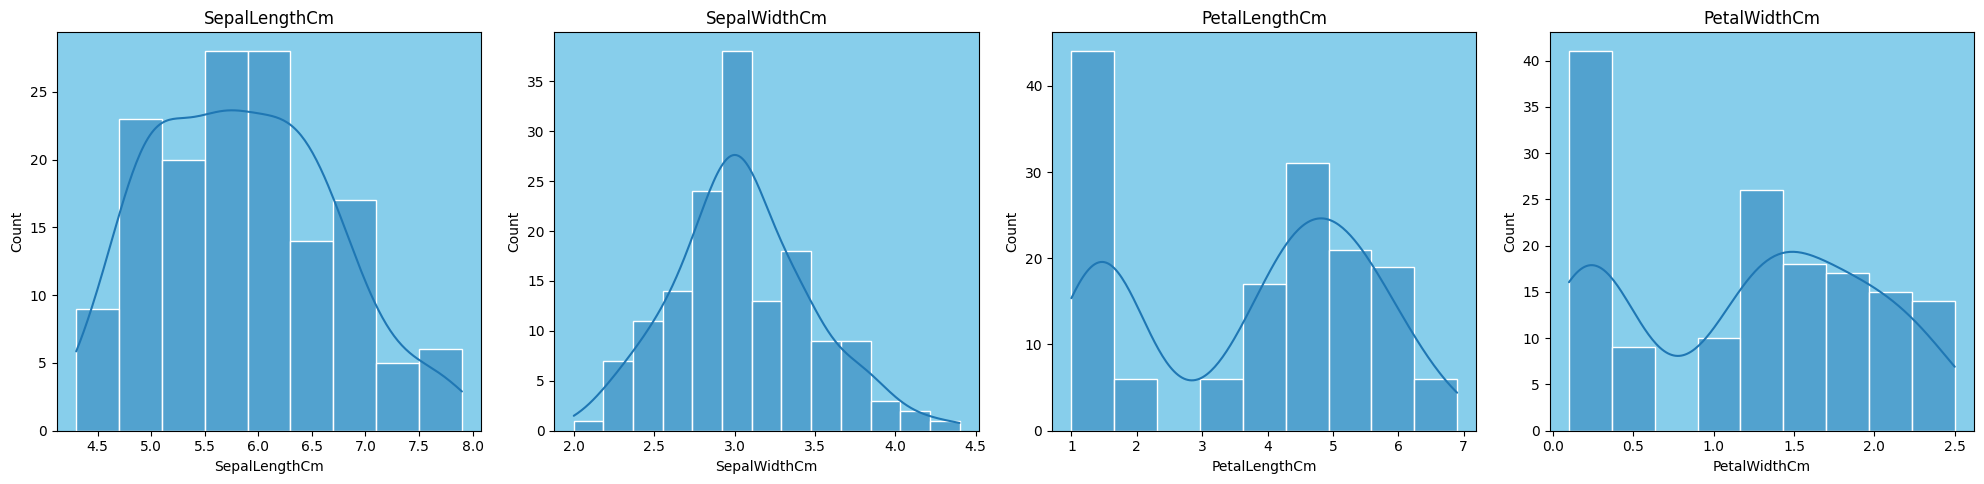

In [ ]:
# Sayısal özellikleri belirleme
numeric_features = [col for col in iris.columns if iris[col].dtype in ['int64', 'float64']]

# Alt grafikler için satır ve sütun sayısını hesaplama
num_features = len(numeric_features)  # Sayısal özelliklerin sayısını al
num_rows = math.ceil(num_features / 4)  # Her satırda 4 grafik olacak şekilde satır sayısını ayarla
num_cols = min(num_features, 4)  # En fazla 4 sütun olacak şekilde sütun sayısını ayarla

# Alt grafiklerin figürünü ve eksenlerini kur
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Ekseni düzleştirme
axes = axes.flatten()

# Seaborn temasını ayarlama
sns.set_theme(style="darkgrid")

# Her sayısal özellik için dağılım grafiği oluşturma
for i, col in enumerate(numeric_features):
    sns.histplot(iris[col], kde=True, ax=axes[i])  # Histogram ve yoğunluk çizgisi oluştur
    axes[i].set_title(col)  # Grafiğin başlığını ayarla
    axes[i].set_facecolor('skyblue')  # Arka plan rengini skyblue olarak ayarla

# Kullanılmayan alt grafiklerin kaldırılması
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])  # Kullanılmayan eksenleri sil

# Düzeni ayarlama ve grafiği gösterme
plt.tight_layout()  # Grafiklerin düzenini ayarla
plt.show()  # Grafikleri ekranda göster

Yukarıdaki grafikleri incelediğimizde, Sayısal Özelliklerin dağılımının Gauss dağılımını takip etmediği açıktır. Bu nedenle, bir sonraki adımımız, Sayısal Özelliklerin dağılımını Gauss dağılımına uyacak şekilde dönüştürmektir.

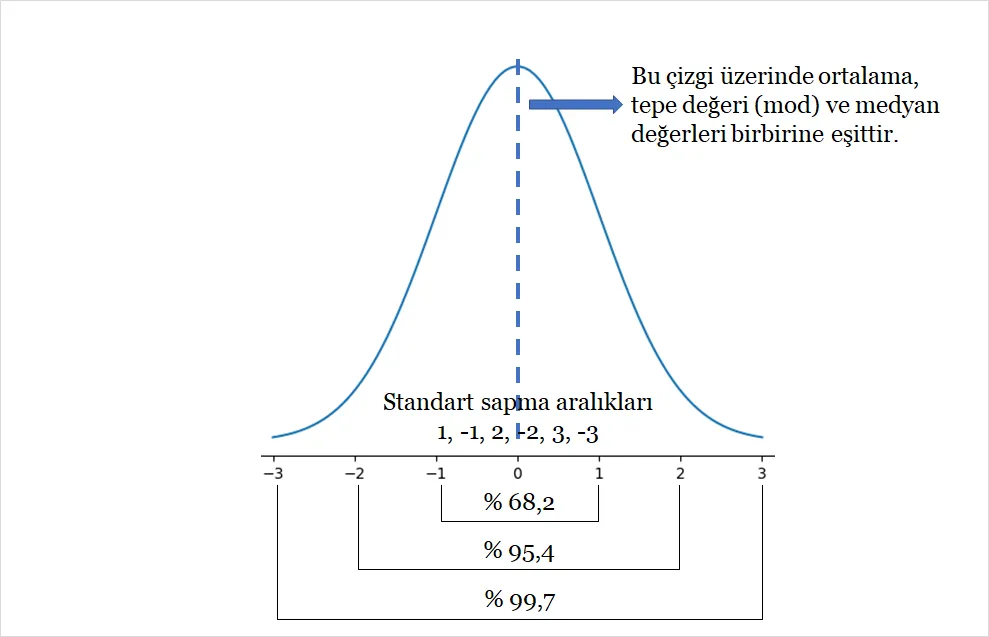

Bu kural, aykırı değerleri kontrol etmemizi sağlar

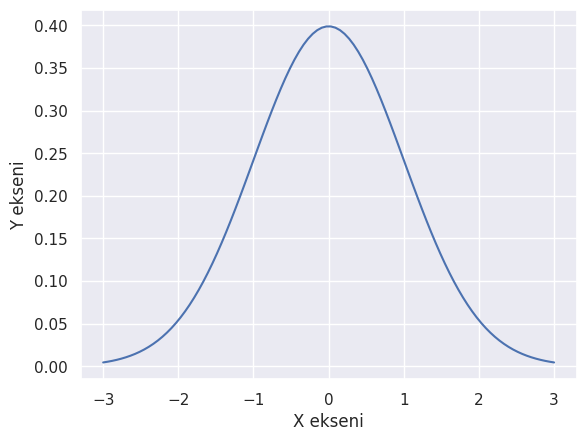

In [ ]:
# Gaussian Dağılım

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3 * sigma,
                mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel("X ekseni")
plt.ylabel("Y ekseni")
plt.show()

# Normalizasyon

Normalizasyon için quantile_transform-Kantitatif Dönüştürücü kullanıyoruz.

Bu dönüşüm, çarpıklığı azaltarak veriyi makine öğrenimi algoritmaları için uygun hale getirir.


In [ ]:
def quantile_transform(data, cols):
    # Kantitatif Dönüştürücü oluştur
    qt = QuantileTransformer(output_distribution='normal')
    # Belirtilen sütunları dönüştürmek için döngü kullan
    for col in cols:
        # Her bir sütunu dönüştür ve orijinal veri çerçevesine kaydet
        data[col] = qt.fit_transform(data[[col]])
    return data  # Dönüştürülmüş veri çerçevesini döndür

# Veriyi dönüştür
df = quantile_transform(iris, numeric_features)  # iris veri çerçevesindeki sayısal özellikleri dönüştür

# QQ Plot Grafiği
QQ (quantile-quantile) grafiği, verilerin normal dağılımın durumunu inceler

Veriler merkez hatta (line) ne kadar yakınsa, verilerin yayılımı normal dağılıma o kadar yakın demektir


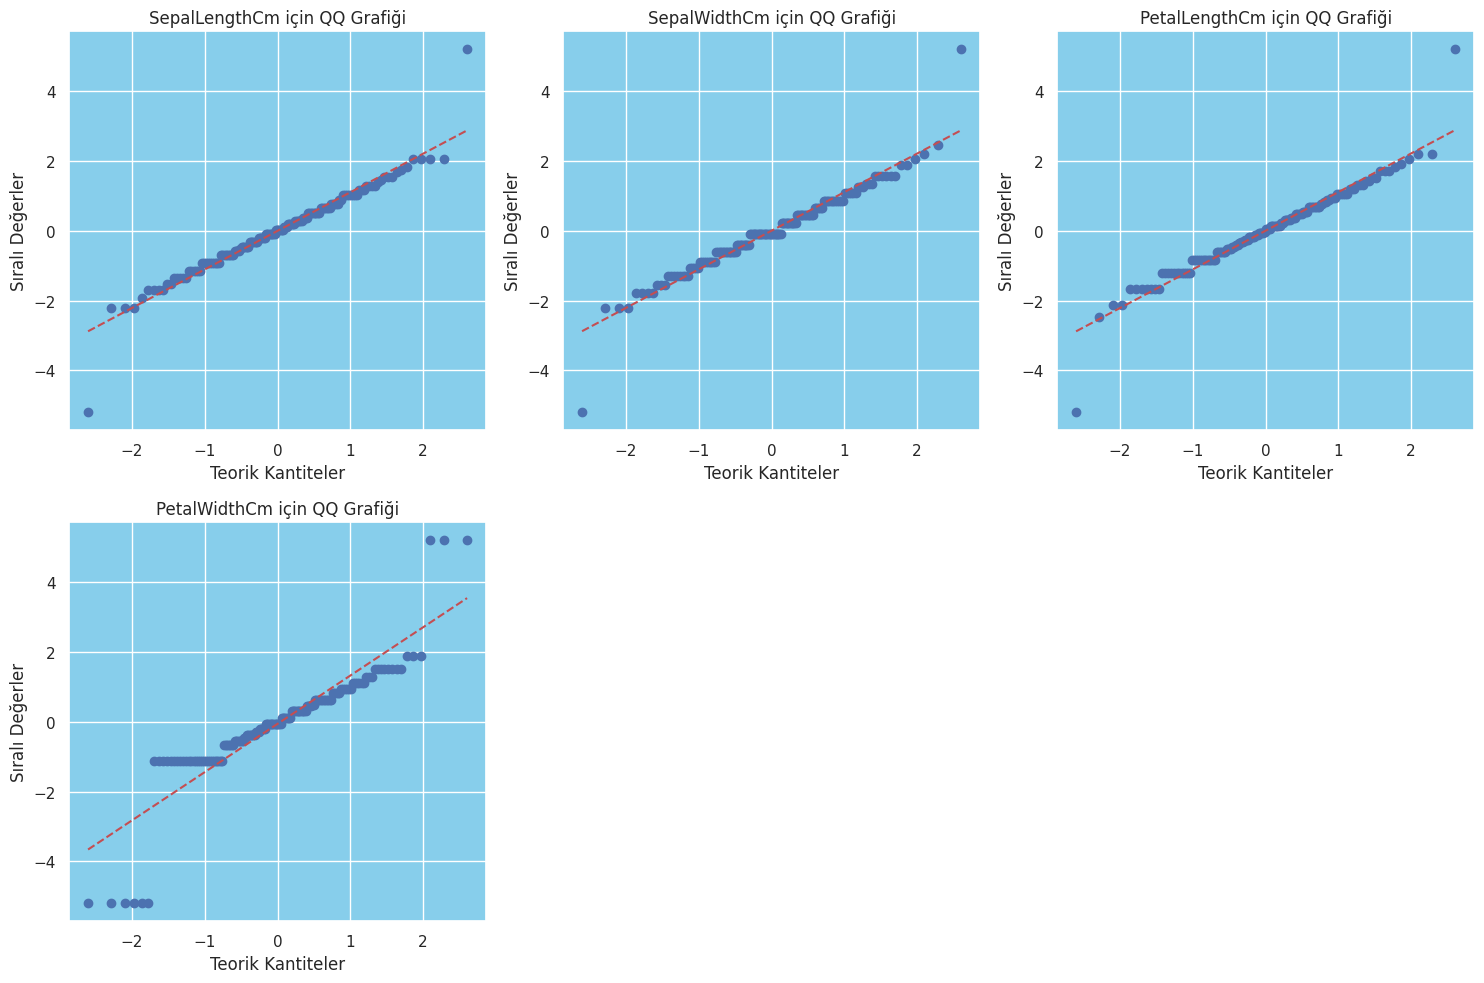

In [ ]:
# QQ grafiklerini oluşturmak için fonksiyon
def plot_qq(df_qt, feature, ax):
    # Verilerin normal dağılıma uygunluğunu kontrol et
    stats.probplot(df_qt[feature], dist="norm", plot=ax)
    # İkinci çizgiyi kesik çizgi yap
    ax.get_lines()[1].set_linestyle('--')
    ax.set_title(f"{feature} için QQ Grafiği")  # Başlık ayarla
    ax.set_xlabel("Teorik Kantiteler")  # X ekseni etiketini ayarla
    ax.set_ylabel("Sıralı Değerler")  # Y ekseni etiketini ayarla

# Alt grafikler için satır ve sütun sayısını hesapla
num_features = len(numeric_features)  # Sayısal özelliklerin sayısını al
num_cols = 3  # Her satırda kaç grafik olacağını belirle
num_rows = math.ceil(num_features / num_cols)  # Gerekli satır sayısını hesapla

# Alt grafikler için figür ve eksenleri ayarla
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Eksenleri düzleştirerek daha kolay döngüye al
axes = axes.flatten()

# Her bir sayısal özellik için döngü oluştur ve QQ grafiği oluştur
for i, col in enumerate(numeric_features):
    plot_qq(df, col, axes[i])  # QQ grafiğini oluştur
    axes[i].set_facecolor('skyblue')  # Eksen arka plan rengini ayarla

# Kullanılmayan alt grafikleri kaldır
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])  # Kullanılmayan eksenleri sil

# Düzeni ayarla
plt.tight_layout()  # Grafiklerin düzenini sıkıştır
plt.show()  # Grafikleri göster

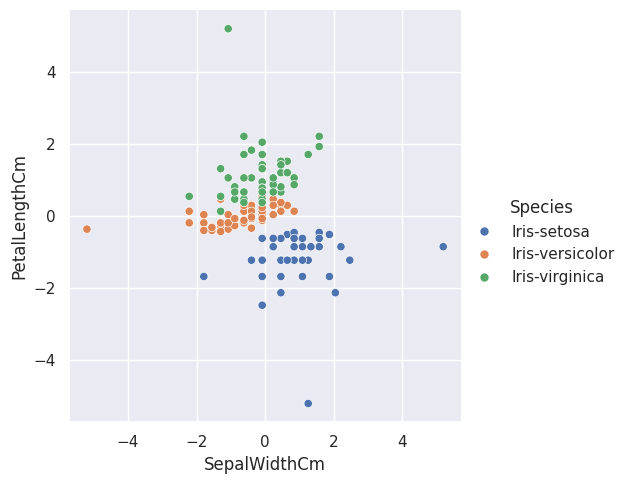

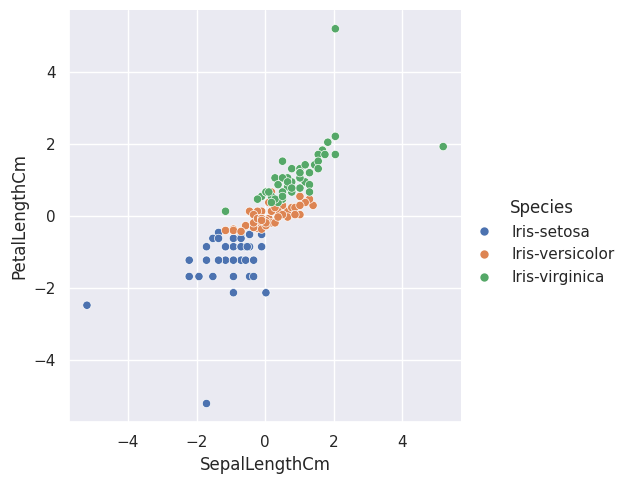

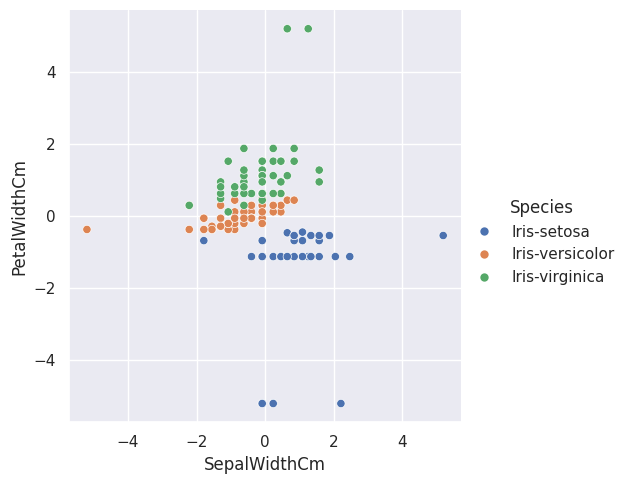

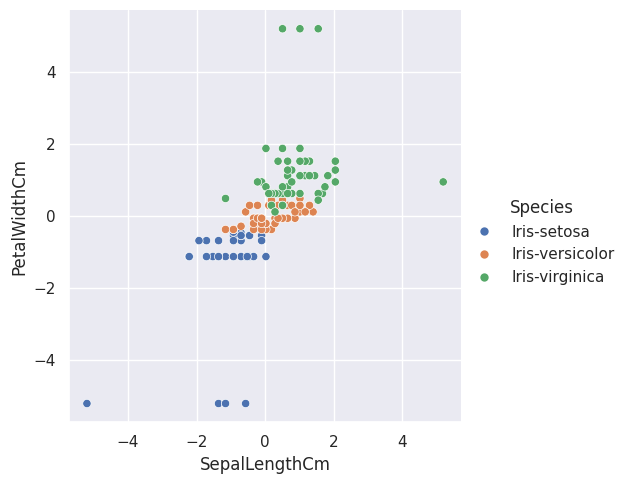

In [ ]:
sns.relplot(data=df, x="SepalWidthCm", y="PetalLengthCm" ,hue="Species" )
sns.relplot(data=df, x="SepalLengthCm", y="PetalLengthCm" ,hue="Species" )
sns.relplot(data=df, x="SepalWidthCm", y="PetalWidthCm" ,hue="Species" )
sns.relplot(data=df, x="SepalLengthCm", y="PetalWidthCm" ,hue="Species" )

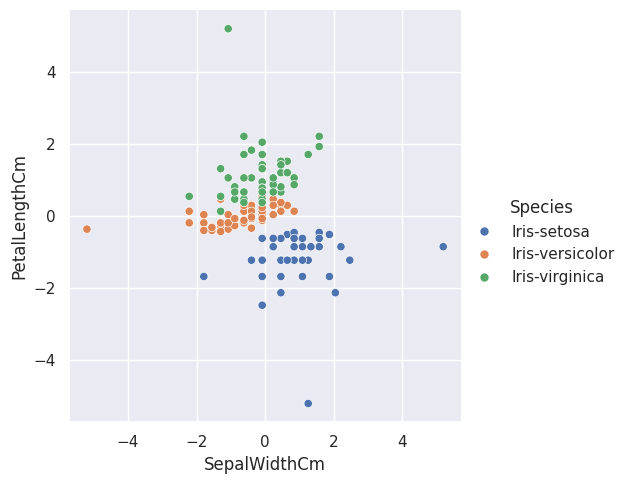

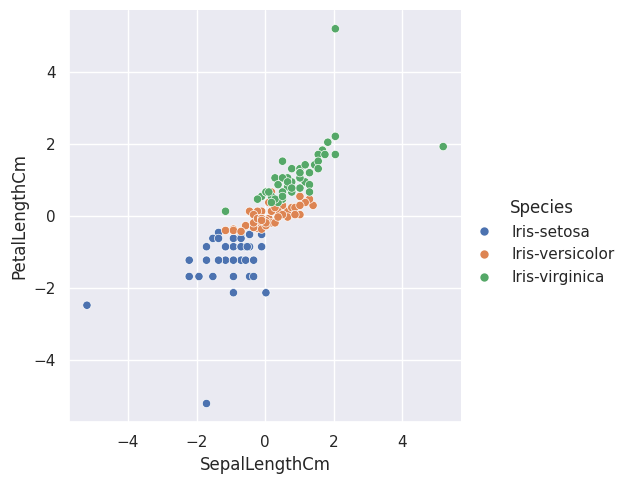

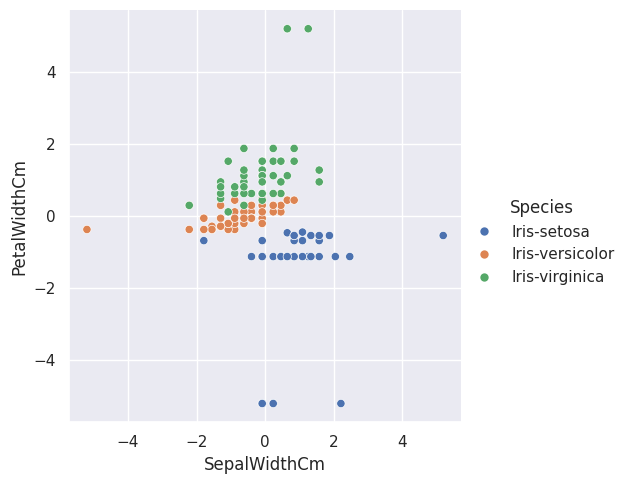

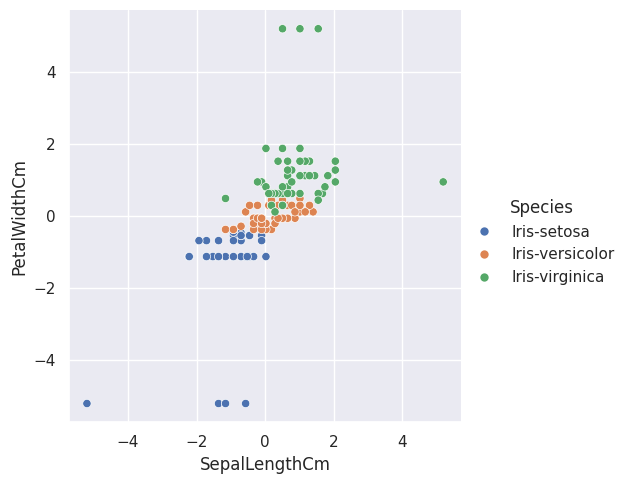

In [ ]:
sns.relplot(data=df, x="SepalWidthCm", y="PetalLengthCm" ,hue="Species" )
sns.relplot(data=df, x="SepalLengthCm", y="PetalLengthCm" ,hue="Species" )
sns.relplot(data=df, x="SepalWidthCm", y="PetalWidthCm" ,hue="Species" )
sns.relplot(data=df, x="SepalLengthCm", y="PetalWidthCm" ,hue="Species" )

##MAKİNE ÖĞRENMESİ##

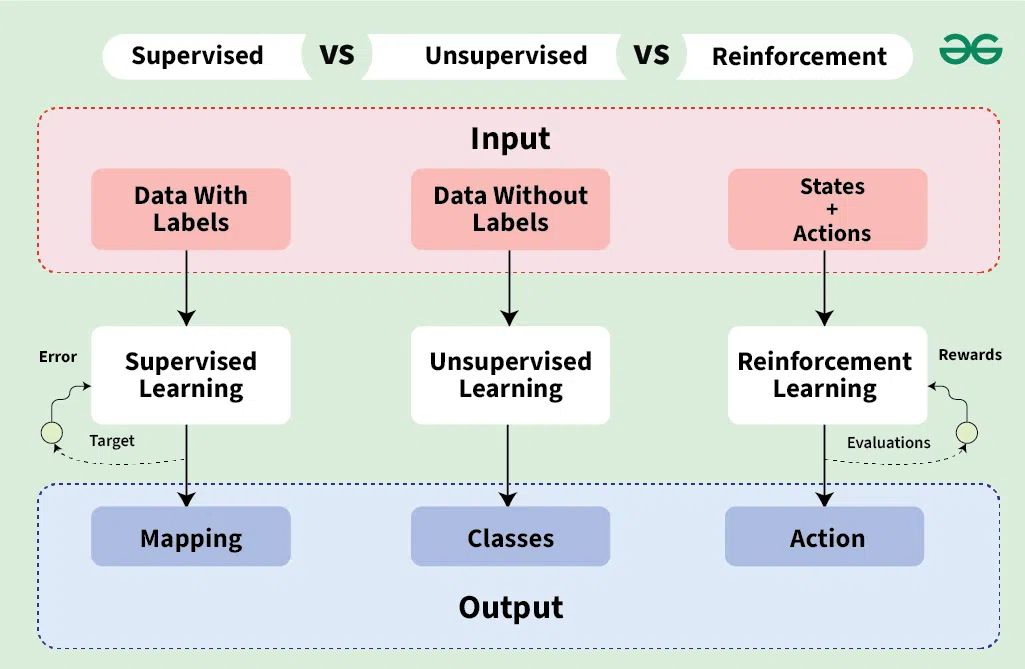

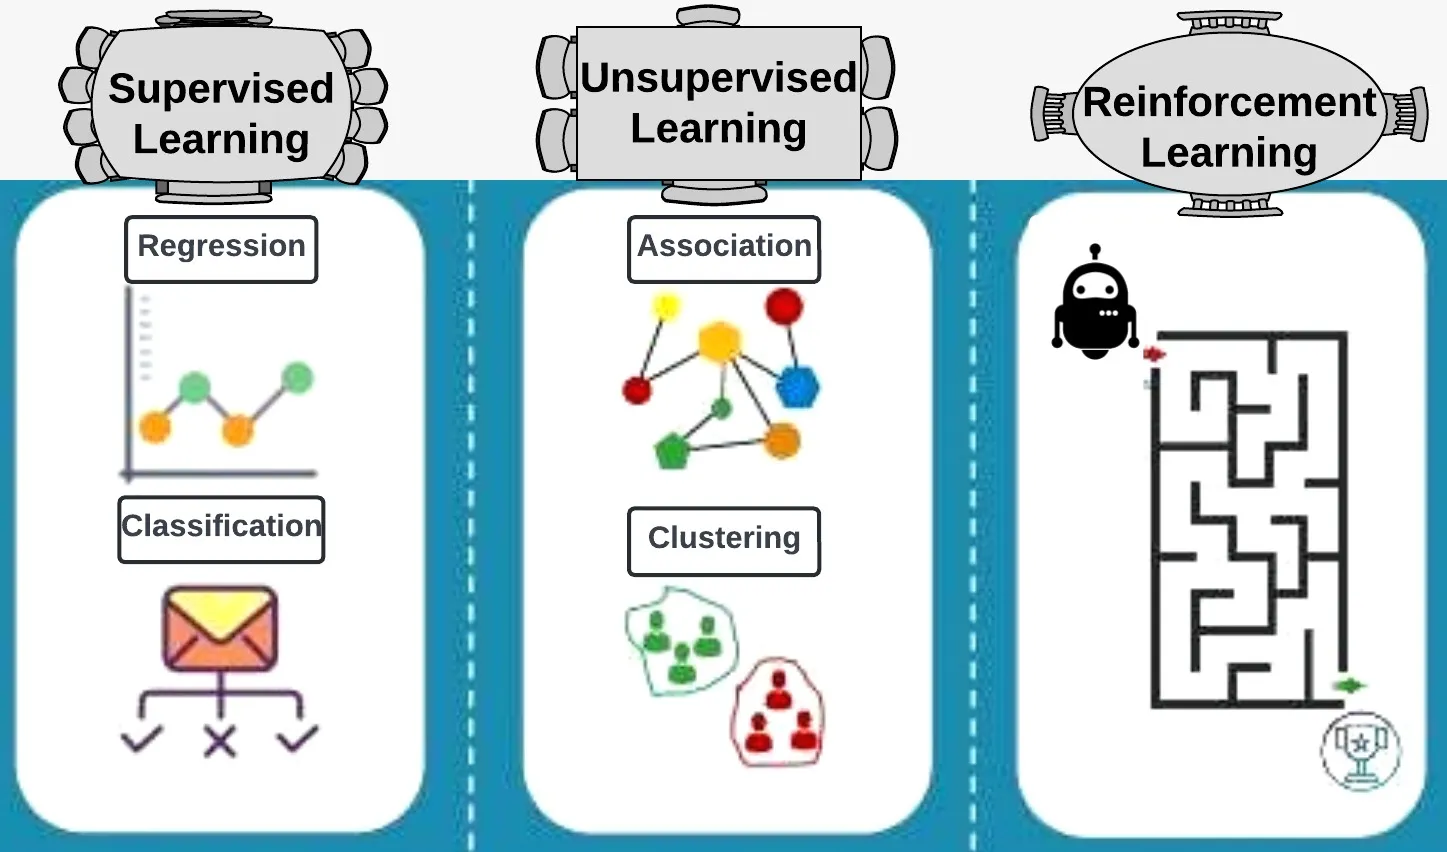


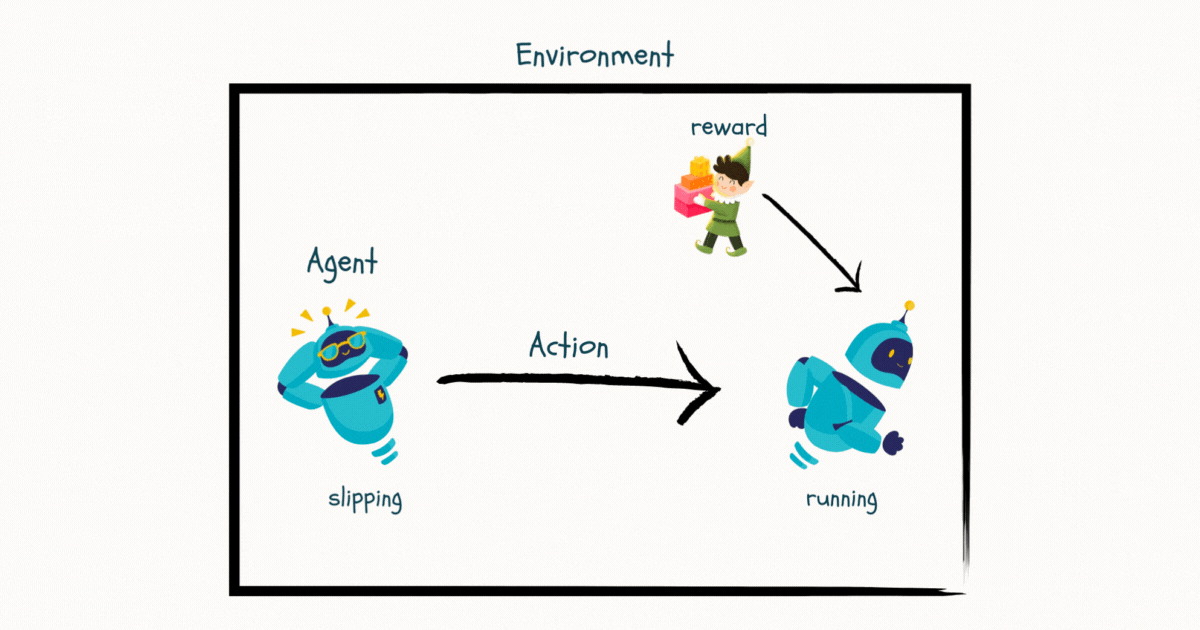

Regression_vs_Classification.avif

**Sınıflandırma**

-Verileri belirli kategorilere ayırma işlemidir.

-Bu kategoriler, modelin eğitildiği etiketli verilere dayanarak belirlenir

-"evet/hayır" veya "spam/değil" gibi ikili sonuçlar veya "A, B, C" gibi çoklu sınıflar şeklinde olabilir.

- E-posta spam tespiti, hastalık teşhisi



**Regresyon**

-Sürekli bir değişkenin tahmin edilmesidir

-Model belirli bir giriş değişkenine dayalı olarak bir sayısal çıktıyı tahmin etmeye çalışır

- Ev fiyat tahmini, geçmiş satış verilerine bakarak gelecekteki satış tahminleri



# Model

In [ ]:
def evaluate_results(y_test, y_pred):
    # Değerlendirme metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)  # Doğruluk oranını hesapla
    precision = precision_score(y_test, y_pred, average='weighted')  # Kesinlik oranını hesapla
    recall = recall_score(y_test, y_pred, average='weighted')  # Duyarlılık oranını hesapla
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 skorunu hesapla

    # Değerlendirme metriklerini yazdır
    print("Doğruluk:", accuracy)  # Doğruluk oranını ekrana yazdır
    print("Kesinlik:", precision)  # Kesinlik oranını ekrana yazdır
    print("Duyarlılık:", recall)  # Duyarlılık oranını ekrana yazdır
    print("F1-skoru:", f1)  # F1 skorunu ekrana yazdır

    # Karmaşıklık matrisini çiz
    cm = confusion_matrix(y_test, y_pred)  # Karmaşıklık matrisini hesapla
    plt.figure(figsize=(6, 4))  # Grafik boyutunu ayarla
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Karmaşıklık matrisini ısı haritası olarak göster
    plt.title('Karmaşıklık Matrisi')  # Grafiğin başlığını ayarla
    plt.xlabel('Tahmin Edilen')  # X ekseni için etiket
    plt.ylabel('Gerçek')  # Y ekseni için etiket
    plt.show()  # Grafiği göster
    return accuracy, precision, recall, f1  # Hesaplanan metrikleri döndür

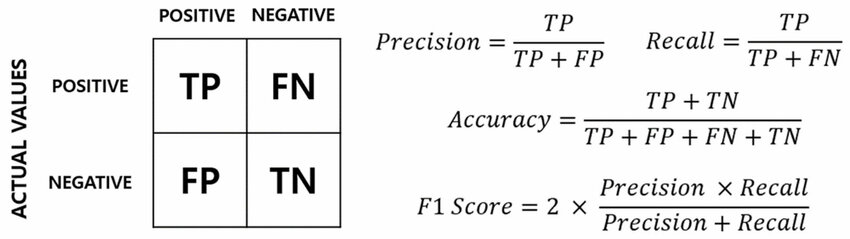

KNN - K-Nearest Neighbors

- Sınıflandırma ve regresyon için etkili

- Veri noktalarını en yakın komşuların çoğunluğuna göre sınıflandırır.

- Aykırı değerlere dayanıklıdır.
- Veri seti büyüdükçe performansı artar.


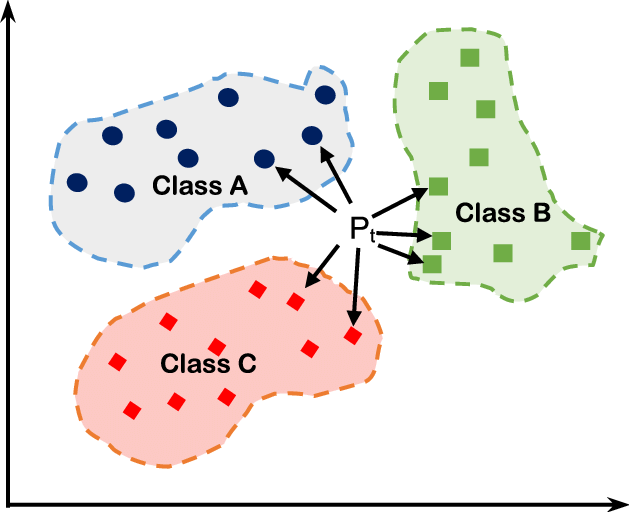

Doğruluk: 1.0
Kesinlik: 1.0
Duyarlılık: 1.0
F1-skoru: 1.0


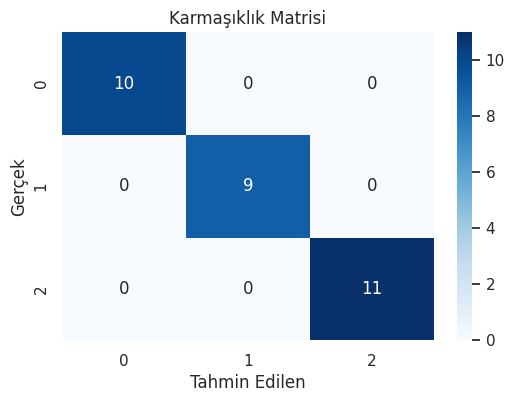

In [ ]:
# Özellikleri ve hedef değişkeni ayır
X = df.drop(columns='Species')  # 'Species' sütununu çıkararak özellikleri oluştur
y = df['Species']  # 'Species' sütununu hedef değişken olarak belirle

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verinin %80'ini eğitim, %20'sini test için ayır, rastgele durum 42 ile sabitlenmiştir

# KNN sınıflandırıcısını başlat
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # 5 komşu kullanarak KNN sınıflandırıcısını oluştur

# Modeli eğit
knn_classifier.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_knn = knn_classifier.predict(X_test)

# Değerlendir
accuracy_knn = evaluate_results(y_test, y_pred_knn)

# Decision Tree Classifier

-Sınıflandırma ve regresyon için etkili bir yöntem

-Veriyi, en önemli özelliklere göre böler

-Her karar bir düğüm/node olur. Sonuçlar da yaprak/leaf olarak adlandırılır.


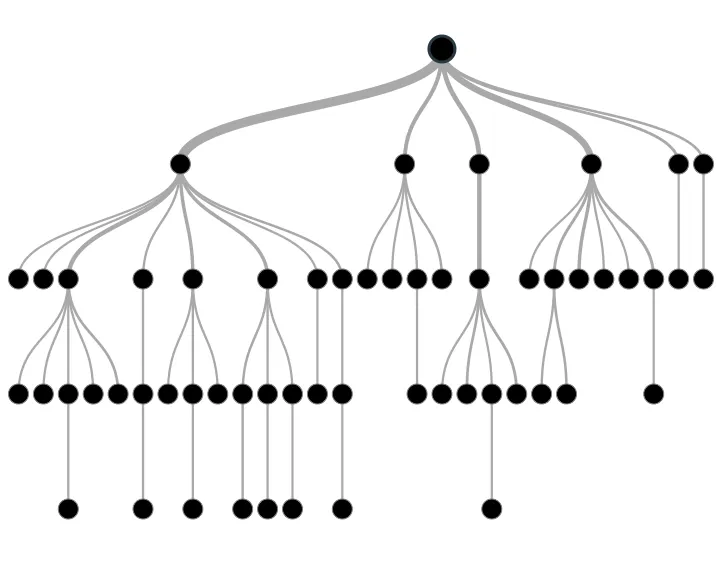

In [ ]:
# Veriyi özellikler (X) ve hedef (y) olarak ayır
X = df.drop(columns='Species')  # 'Species' sütununu çıkararak özellikleri oluştur
y = df['Species']  # 'Species' sütununu hedef değişken olarak belirle

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verinin %80'ini eğitim, %20'sini test için ayır, rastgele durum 42 ile sabitlenmiştir

# Karar ağaç sınıflandırıcısını tanımla
dt_classifier = DecisionTreeClassifier()  # Karar ağaç sınıflandırıcısını oluştur

# Modeli eğit
dt_classifier.fit(X_train, y_train)  # Eğitim verileri ile modeli eğit

# Test setinde tahmin yap
y_pred_dt = dt_classifier.predict(X_test)  # Test verileri üzerinde tahmin yap

# Modelin doğruluğunu değerlendir
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Doğruluğu hesapla
print(f'Doğruluk: {accuracy_dt:.2f}')  # Sonucu ekrana yazdır #.2f ifadesi iki basamaklı ondalık bir sayı göstermeyi sağlar

Doğruluk: 1.00


#Random Forest Classifier

-Sınıflandırma ve regresyon problemlerinde kullanılabilir
-Hangi özelliklerin model için önemli olduğunu belirlemede kullanılabilir.

- Kredi değerlendirmesi ve risk analizi gibi finansal problemlerde, genetik veri analizi, hastalık sınıflandırmalarında, müşteri segmentasyonu ve satış tahminlerinde

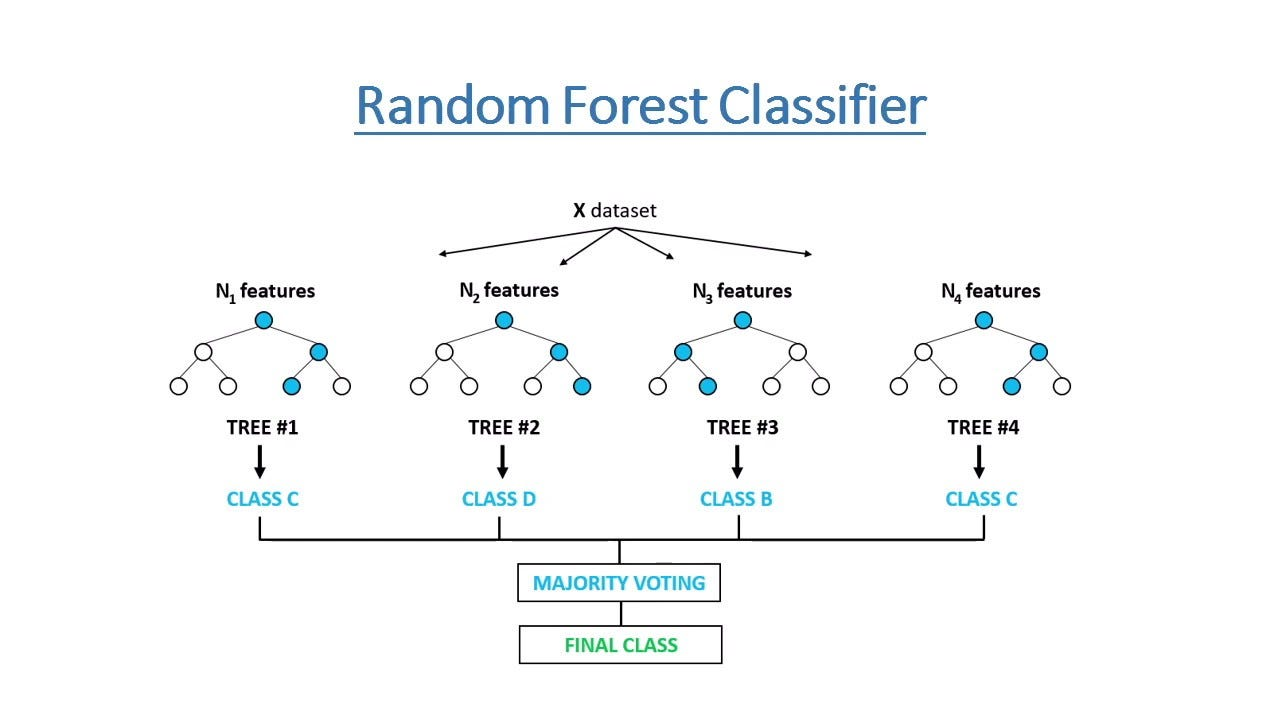

In [ ]:
# Veriyi özellikler (X) ve hedef (y) olarak ayır
X = df.drop(columns='Species')  # 'Species' sütununu çıkararak özellikleri oluştur
y = df['Species']  # 'Species' sütununu hedef değişken olarak belirle

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verinin %80'ini eğitim, %20'sini test için ayır, rastgele durum 42 ile sabitlenmiştir

# Random Forest sınıflandırıcısını tanımla
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 ağaçla bir Random Forest oluştur

# Modeli eğit
rf_classifier.fit(X_train, y_train)  # Eğitim verileri ile modeli eğit

# Test setinde tahmin yap
y_pred_rf = rf_classifier.predict(X_test)  # Test verileri üzerinde tahmin yap

# Modelin doğruluğunu değerlendir
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Doğruluğu hesapla
print(f'Doğruluk: {accuracy_rf:.2f}')  # Sonucu ekrana yazdır

Doğruluk: 1.00


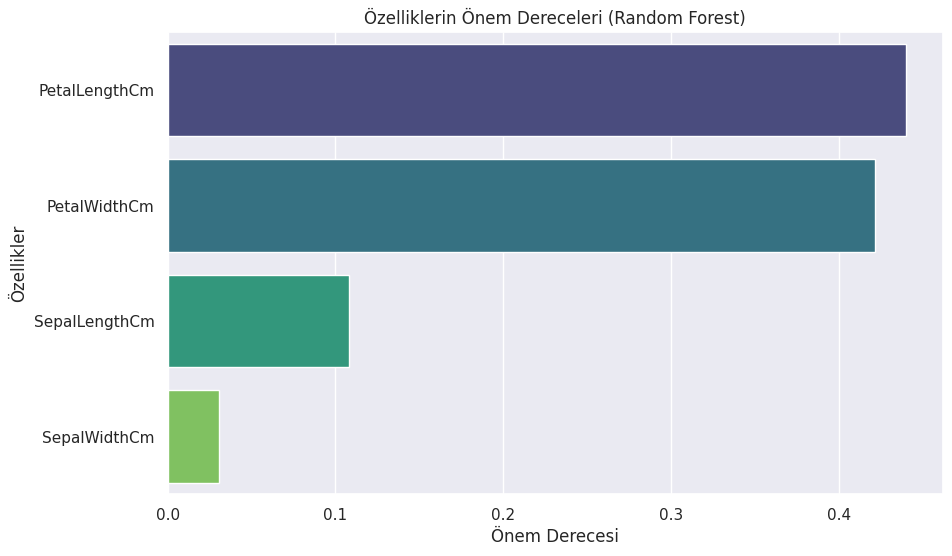

In [ ]:
# Özellik önemlerini al
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Özelliklerin önemini görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Özelliklerin Önem Dereceleri (Random Forest)')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellikler')
plt.show()

# SVM (Support Vector Machine)



- İki sınıf arasındaki en iyi ayırıcı çizgiyi (veya hiper düzlemi) bulmaya çalışır
- Bu hyperplane, her iki sınıfı maksimum mesafeyle ayırır
- SVM, "margin" adı verilen bu mesafeyi en iyi şekilde artırmak için çalışır



- Sınıflandırma ve regresyon için kullanılır
- Görüntü tanıma, metin sınıflandırma, biyoinformatik alanlarında etkili
- Boyut sayısının örnek sayısını aştığı durumlarda bile iyi performans gösterir
- Destek vektörleri sayesinde bellek kullanımı azalır ve eğitim süresi hızlanır

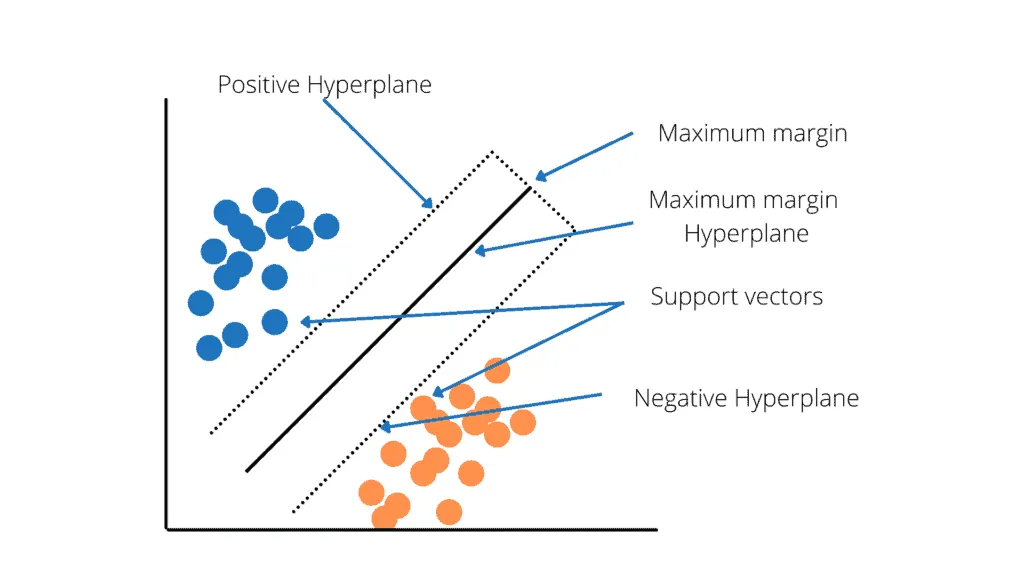

Doğruluk: 1.0
Kesinlik: 1.0
Duyarlılık: 1.0
F1-skoru: 1.0


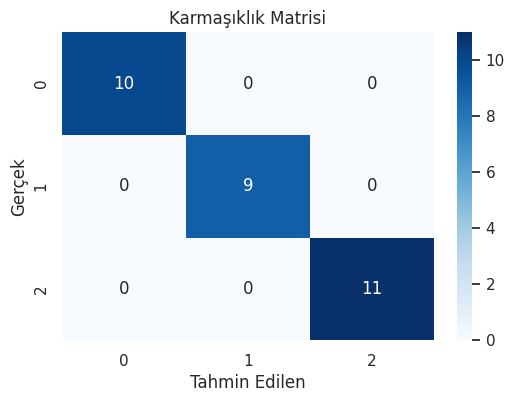

In [ ]:

X = df.drop(columns='Species', axis=1)  # 'Species' sütunu hariç tüm sütunları X'e ata
y = df['Species']  # 'Species' sütununu y'ye ata

# Veriyi Eğitim ve Test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verinin %80'ini eğitim, %20'sini test için ayır; random_state ile tekrarlanabilirlik sağla

# SVM modelini oluşturma ve eğitme
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
# Lineer çekirdekli SVM sınıflandırıcıyı oluştur
svm_classifier.fit(X_train, y_train)  # Modeli eğitim verisi ile eğit

# Test setinde tahmin yapma
y_pred_svm = svm_classifier.predict(X_test)  # Test verisi üzerindeki tahminleri yap

# Modelin değerlendirilmesi
accuracy_svm = evaluate_results(y_test, y_pred_svm)
# Tahmin edilen sonuçlar ile gerçek sonuçları karşılaştır ve doğruluğu hesapla